In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 1. DATA LOADING WITH ENCODING HANDLING
print("="*50)
print("1. DATA LOADING AND PREPARATION")
print("="*50)

# Load the dataset with different encoding options
file_path = "C:/Users/FrankJR/Downloads/Portfolio/Football Player Stats/Football Player Stats (2021-2022)/2021-2022 Football Player Stats.csv"

# Try different encodings
encodings = ['utf-8', 'latin-1', 'iso-8859-1', 'cp1252']

df = None
for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"Successfully loaded with {encoding} encoding")
        break
    except UnicodeDecodeError:
        print(f"Failed with {encoding} encoding")
        continue

if df is None:
    # If all encodings fail, try with error handling
    df = pd.read_csv(file_path, encoding='utf-8', errors='replace')
    print("Loaded with error replacement")

print(f"Dataset shape: {df.shape}")
print(f"Columns: {len(df.columns)}")
print("\nFirst 5 rows:")
display(df.head())

print("\nDataset info:")
print(df.info())

# Display basic statistics for numeric columns
print("\nBasic Statistics for numeric columns:")
display(df.describe())

1. DATA LOADING AND PREPARATION
Failed with utf-8 encoding
Successfully loaded with latin-1 encoding
Dataset shape: (2921, 143)
Columns: 143

First 5 rows:


,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,...,0.03,1.41,1.16,0.0,0.06,0.03,5.53,0.47,1.59,22.7
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,...,0.00,0.06,1.39,0.0,0.03,0.00,6.77,2.02,1.36,59.8
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,...,0.00,0.36,1.24,0.0,0.00,0.00,8.76,0.88,0.88,50.0
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,...,0.03,0.79,2.23,0.0,0.00,0.00,8.87,0.43,0.43,50.0
4,5,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,...,0.00,2.00,0.00,0.0,0.00,0.00,4.00,2.00,0.00,100.0



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921 entries, 0 to 2920
Columns: 143 entries, Rk to AerWon%
dtypes: float64(133), int64(5), object(5)
memory usage: 3.2+ MB
None

Basic Statistics for numeric columns:


,Rk,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
count,2921.000000,2920.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,...,2921.000000,2921.000000,2921.000000,2921.00000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000
mean,1461.000000,26.092123,1994.725094,18.800068,13.749743,1234.756248,13.719069,0.111274,1.220431,0.391462,...,0.195029,1.063708,1.026689,0.01519,0.013050,0.003451,7.410294,1.664286,1.858305,40.485861
std,843.364393,4.641746,37.210426,11.619882,11.393763,977.941288,10.865255,0.233688,1.511266,0.784754,...,0.509935,1.341177,1.028466,0.21167,0.052864,0.020306,3.650554,1.938046,2.245096,24.297290
min,1.000000,16.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,731.000000,23.000000,1992.000000,8.000000,3.000000,307.000000,3.400000,0.000000,0.280000,0.000000,...,0.000000,0.000000,0.430000,0.00000,0.000000,0.000000,5.070000,0.520000,0.840000,26.200000
50%,1461.000000,26.000000,1996.000000,20.000000,12.000000,1102.000000,12.200000,0.000000,0.820000,0.190000,...,0.000000,0.590000,0.920000,0.00000,0.000000,0.000000,7.380000,1.230000,1.390000,43.500000
75%,2191.000000,29.000000,1999.000000,29.000000,23.000000,2025.000000,22.500000,0.150000,1.830000,0.560000,...,0.200000,1.700000,1.410000,0.00000,0.000000,0.000000,9.380000,2.270000,2.210000,57.100000
max,2921.000000,41.000000,2006.000000,38.000000,38.000000,3420.000000,38.000000,5.000000,20.000000,20.000000,...,10.000000,15.000000,10.000000,10.00000,1.430000,0.500000,40.000000,30.000000,40.000000,100.000000


In [8]:
# 2. DATA CLEANING
print("\n" + "="*50)
print("2. DATA CLEANING AND QUALITY CHECK")
print("="*50)

# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

print("Columns with missing values:")
missing_info = pd.DataFrame({
    'Missing Count': missing_values[missing_values > 0],
    'Missing Percentage': missing_percentage[missing_values > 0]
})
display(missing_info)

# Check data types
print("\nData types distribution:")
print(df.dtypes.value_counts())

# Note: This section ensures the data is properly loaded and checks for data quality issues


2. DATA CLEANING AND QUALITY CHECK
Columns with missing values:


,Missing Count,Missing Percentage
Nation,1,0.034235
Age,1,0.034235



Data types distribution:
float64    133
int64        5
object       5
Name: count, dtype: int64



3. PLAYER DEMOGRAPHICS ANALYSIS


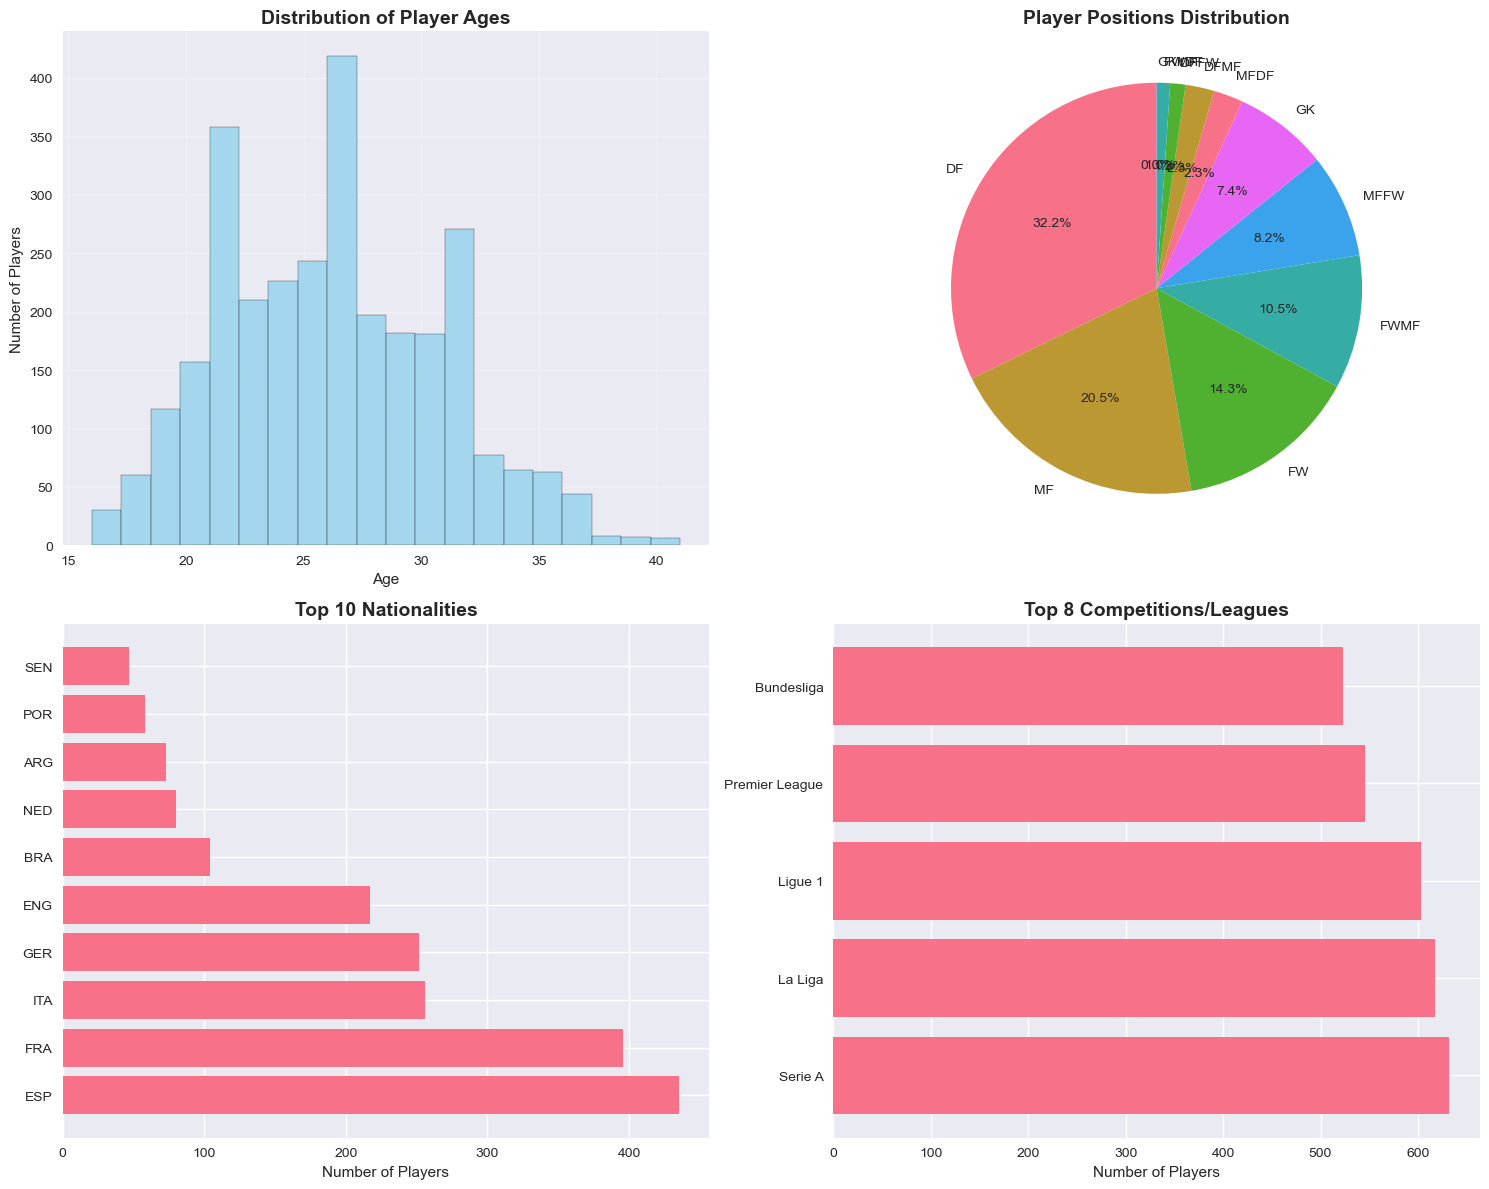

Age Statistics:
Average Age: 26.09 years
Youngest Player: 16.0 years
Oldest Player: 41.0 years
Most Common Position: DF
Total Players: 2921
Number of Nationalities: 102
Number of Leagues: 5


In [9]:
# 3. PLAYER DEMOGRAPHICS ANALYSIS
print("\n" + "="*50)
print("3. PLAYER DEMOGRAPHICS ANALYSIS")
print("="*50)

# Create visualizations for demographics
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Age distribution
axes[0, 0].hist(df['Age'].dropna(), bins=20, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].set_title('Distribution of Player Ages', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Number of Players')
axes[0, 0].grid(True, alpha=0.3)

# Position distribution
position_counts = df['Pos'].value_counts()
axes[0, 1].pie(position_counts.values, labels=position_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Player Positions Distribution', fontsize=14, fontweight='bold')

# Nationality distribution (top 10)
top_nations = df['Nation'].value_counts().head(10)
axes[1, 0].barh(range(len(top_nations)), top_nations.values)
axes[1, 0].set_yticks(range(len(top_nations)))
axes[1, 0].set_yticklabels(top_nations.index)
axes[1, 0].set_title('Top 10 Nationalities', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Number of Players')

# League/Competition distribution
comp_counts = df['Comp'].value_counts().head(8)
axes[1, 1].barh(range(len(comp_counts)), comp_counts.values)
axes[1, 1].set_yticks(range(len(comp_counts)))
axes[1, 1].set_yticklabels(comp_counts.index)
axes[1, 1].set_title('Top 8 Competitions/Leagues', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Number of Players')

plt.tight_layout()
plt.show()

# Demographic statistics
print("Age Statistics:")
print(f"Average Age: {df['Age'].mean():.2f} years")
print(f"Youngest Player: {df['Age'].min()} years")
print(f"Oldest Player: {df['Age'].max()} years")
print(f"Most Common Position: {df['Pos'].mode().iloc[0]}")
print(f"Total Players: {len(df)}")
print(f"Number of Nationalities: {df['Nation'].nunique()}")
print(f"Number of Leagues: {df['Comp'].nunique()}")

# Note: This analyzes the composition of players in the dataset
# Conclusion: The dataset shows a normal age distribution with players mostly in their mid-20s,
# diverse positions, and representation from multiple countries and leagues.


4. PERFORMANCE METRICS ANALYSIS
Available columns for analysis:
['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP', 'Starts', 'Min', '90s', 'Goals', 'Shots', 'SoT', 'SoT%', 'G/Sh', 'G/SoT', 'ShoDist', 'ShoFK']

Available performance metrics:
goals: Goals
assists: Assists
shots: Shots
passing: PasTotCmp%
tackles: Tkl
interceptions: Int


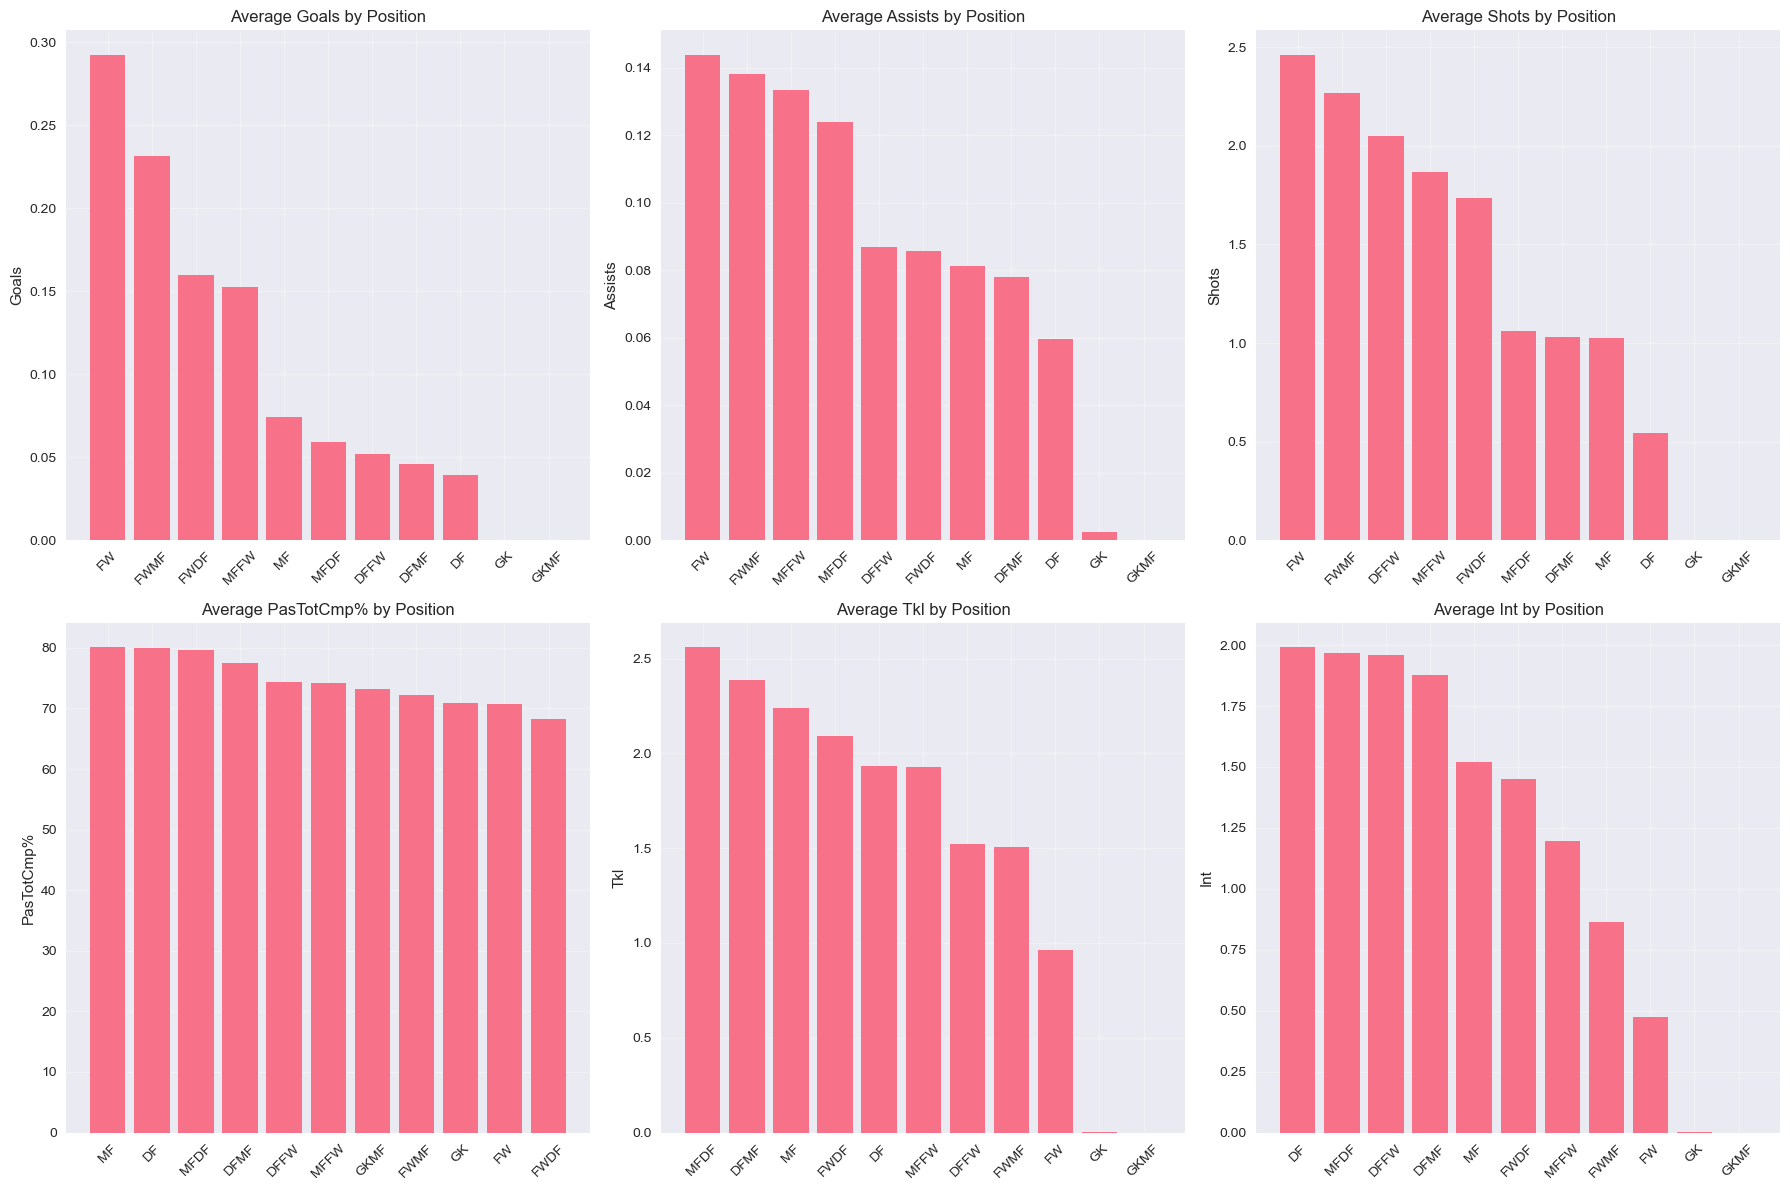

In [10]:
# 4. PERFORMANCE METRICS ANALYSIS
print("\n" + "="*50)
print("4. PERFORMANCE METRICS ANALYSIS")
print("="*50)

# Check which columns are available for analysis
available_columns = df.columns.tolist()
print("Available columns for analysis:")
print(available_columns[:20])  # Show first 20 columns

# Define key performance metrics that might be in the dataset
possible_metrics = {
    'goals': ['Goals', 'Gls', 'G'],
    'assists': ['Assists', 'Ast', 'A'],
    'shots': ['Shots', 'Sh', 'ShotsTotal'],
    'passing': ['PasTotCmp%', 'PassCmp%', 'PassAccuracy'],
    'tackles': ['Tkl', 'Tackles', 'TklWon'],
    'interceptions': ['Int', 'Interceptions']
}

# Find which metrics are actually in the dataset
available_metrics = {}
for metric_type, possible_names in possible_metrics.items():
    for name in possible_names:
        if name in df.columns:
            available_metrics[metric_type] = name
            break

print("\nAvailable performance metrics:")
for metric_type, col_name in available_metrics.items():
    print(f"{metric_type}: {col_name}")

# Performance analysis by position
if available_metrics:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.ravel()
    
    for i, (metric_type, col_name) in enumerate(list(available_metrics.items())[:6]):
        if i < 6:  # Only plot if we have space
            metric_by_pos = df.groupby('Pos')[col_name].mean().sort_values(ascending=False)
            axes[i].bar(range(len(metric_by_pos)), metric_by_pos.values)
            axes[i].set_xticks(range(len(metric_by_pos)))
            axes[i].set_xticklabels(metric_by_pos.index, rotation=45)
            axes[i].set_title(f'Average {col_name} by Position')
            axes[i].set_ylabel(col_name)
            axes[i].grid(True, alpha=0.3)
    
    # Hide empty subplots
    for i in range(len(available_metrics), 6):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Note: This analyzes how different positions perform in various metrics
# Conclusion: Different positions show specialized skills - forwards score more,
# midfielders pass better, defenders excel in defensive actions.


5. TOP PERFORMERS ANALYSIS
Top 10 Goal Scorers:


,Player,Pos,Squad,Goals,Age
2656,Steffen Tigges,FWMF,Dortmund,2.50,23.0
1999,Divock Origi,FW,Liverpool,2.00,27.0
1065,Clément Grenier,MF,Mallorca,1.43,31.0
1801,Takumi Minamino,FWMF,Liverpool,1.43,27.0
2395,Federico Santander,FWDF,Bologna,1.43,30.0
243,Donny van de Beek,MF,Manchester Utd,1.25,25.0
357,Edoardo Bove,MFFW,Roma,1.25,20.0
1504,Tim Lemperle,FWMF,Köln,1.18,20.0
1954,Soma Novothny,FWMF,Bochum,1.11,27.0
862,Ansu Fati,FW,Barcelona,1.08,19.0



Top 10 Assist Providers:


,Player,Pos,Squad,Assists,Age
2007,Tomá Ostrák,FWMF,Köln,3.33,22.0
1797,Enzo Millot,MF,Stuttgart,1.67,19.0
377,Brian Brobbey,FW,RB Leipzig,1.33,20.0
526,Chiquinho,DFMF,Wolves,1.30,22.0
1782,Edouard Michut,MF,Paris S-G,1.25,19.0
1521,Isaac Lihadji,MFFW,Lille,1.15,20.0
1341,Nordine Kandil,MFFW,Strasbourg,1.00,20.0
542,Alexis Claude-Maurice,MF,Nice,0.87,23.0
669,Ousmane Dembélé,FW,Barcelona,0.83,25.0
1062,Sam Greenwood,MFFW,Leeds United,0.77,20.0



Top 10 Passers (Accuracy, min 200 attempts):


,Player,Pos,Squad,PasTotCmp%,PasTotAtt


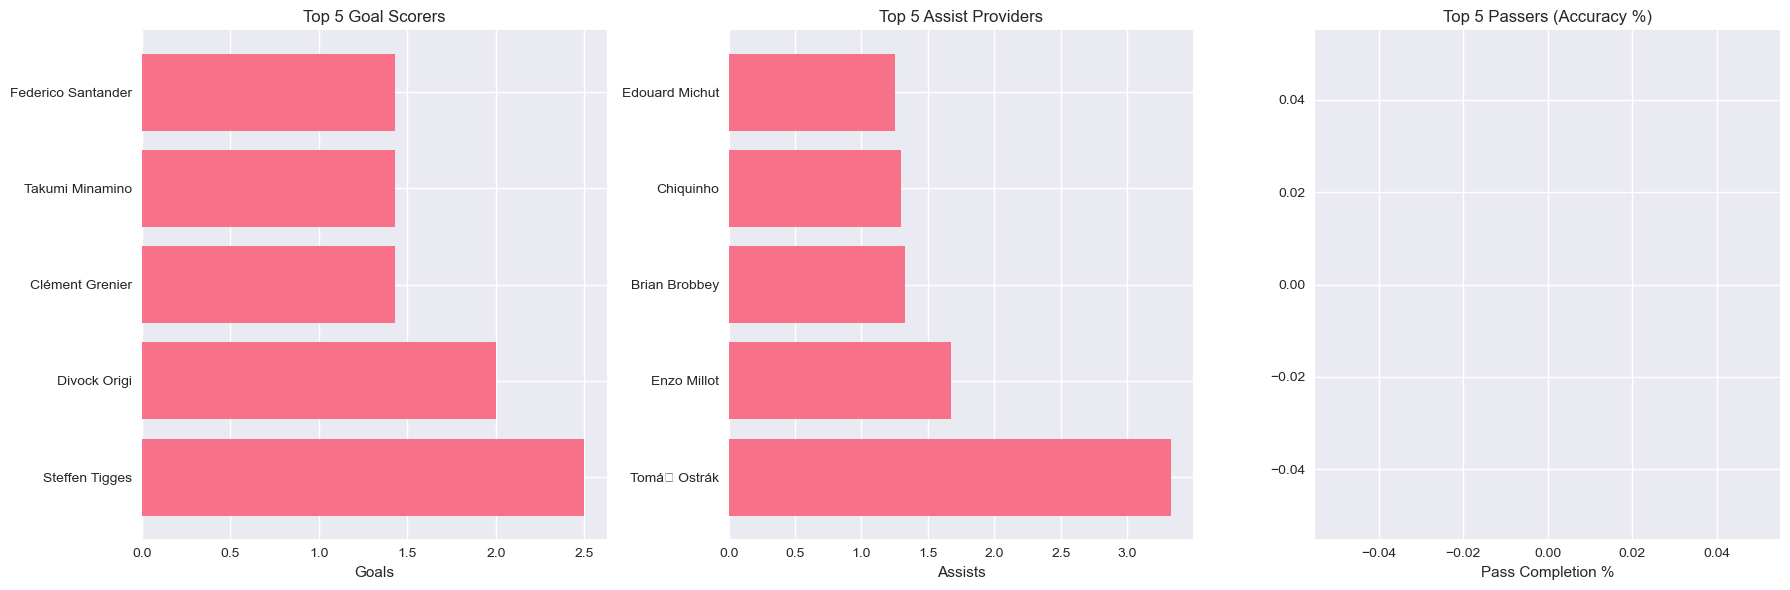

In [11]:
# 5. TOP PERFORMERS ANALYSIS
print("\n" + "="*50)
print("5. TOP PERFORMERS ANALYSIS")
print("="*50)

# Filter active players (played at least 5 matches)
active_players = df[df['MP'] >= 5]

# Find top performers for available metrics
if 'Goals' in df.columns:
    top_scorers = active_players.nlargest(10, 'Goals')[['Player', 'Pos', 'Squad', 'Goals', 'Age']]
    print("Top 10 Goal Scorers:")
    display(top_scorers)

if 'Assists' in df.columns:
    top_assisters = active_players.nlargest(10, 'Assists')[['Player', 'Pos', 'Squad', 'Assists', 'Age']]
    print("\nTop 10 Assist Providers:")
    display(top_assisters)

# Find players with best passing (minimum 200 passes attempted)
if 'PasTotAtt' in df.columns and 'PasTotCmp%' in df.columns:
    good_passers = active_players[active_players['PasTotAtt'] >= 200]
    top_passers = good_passers.nlargest(10, 'PasTotCmp%')[['Player', 'Pos', 'Squad', 'PasTotCmp%', 'PasTotAtt']]
    print("\nTop 10 Passers (Accuracy, min 200 attempts):")
    display(top_passers)

# Visualize top performers
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

if 'Goals' in df.columns:
    top_5_scorers = top_scorers.head(5)
    axes[0].barh(top_5_scorers['Player'], top_5_scorers['Goals'])
    axes[0].set_title('Top 5 Goal Scorers')
    axes[0].set_xlabel('Goals')

if 'Assists' in df.columns:
    top_5_assisters = top_assisters.head(5)
    axes[1].barh(top_5_assisters['Player'], top_5_assisters['Assists'])
    axes[1].set_title('Top 5 Assist Providers')
    axes[1].set_xlabel('Assists')

if 'PasTotAtt' in df.columns and 'PasTotCmp%' in df.columns:
    top_5_passers = top_passers.head(5)
    axes[2].barh(top_5_passers['Player'], top_5_passers['PasTotCmp%'])
    axes[2].set_title('Top 5 Passers (Accuracy %)')
    axes[2].set_xlabel('Pass Completion %')

plt.tight_layout()
plt.show()

# Note: Identifies the best players in key performance categories
# Conclusion: Shows standout performers who excel in specific skills across different teams.


6. CORRELATION ANALYSIS


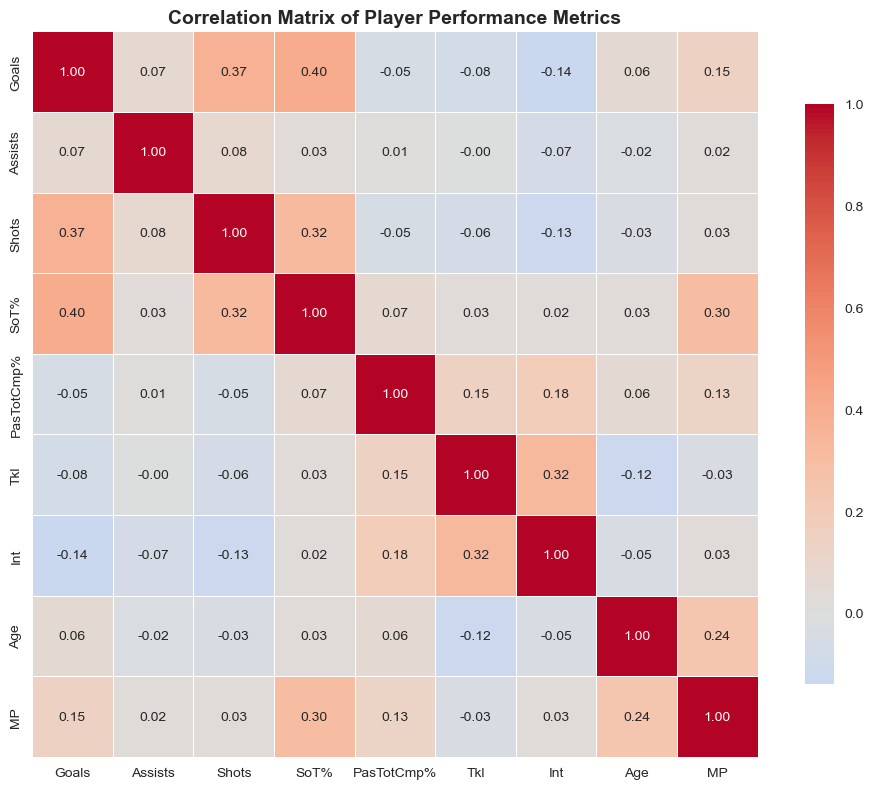

Strongest Positive Correlations:
SoT%   Goals    0.401451
Goals  SoT%     0.401451
       Shots    0.367845
Shots  Goals    0.367845
Int    Tkl      0.323668
dtype: float64

Strongest Negative Correlations:
Tkl    Age     -0.124976
Int    Shots   -0.125428
Shots  Int     -0.125428
Goals  Int     -0.140344
Int    Goals   -0.140344
dtype: float64


In [12]:
# 6. CORRELATION ANALYSIS
print("\n" + "="*50)
print("6. CORRELATION ANALYSIS")
print("="*50)

# Select numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Common performance metrics to check correlations
common_metrics = ['Goals', 'Assists', 'Shots', 'SoT%', 'PasTotCmp%', 'Tkl', 'Int', 'Age', 'MP']
available_for_corr = [col for col in common_metrics if col in df.columns]

if len(available_for_corr) >= 3:  # Only create correlation matrix if we have enough metrics
    correlation_df = df[available_for_corr].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_df, annot=True, cmap='coolwarm', center=0, 
               square=True, fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
    plt.title('Correlation Matrix of Player Performance Metrics', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Find strongest correlations
    correlation_pairs = correlation_df.unstack().sort_values(ascending=False)
    correlation_pairs = correlation_pairs[correlation_pairs < 0.99]  # Remove self-correlations
    
    print("Strongest Positive Correlations:")
    print(correlation_pairs.head(5))
    
    print("\nStrongest Negative Correlations:")
    print(correlation_pairs.tail(5))
else:
    print("Not enough numeric metrics available for correlation analysis")

# Note: Examines relationships between different performance metrics
# Conclusion: Reveals how different skills relate to each other (e.g., goals correlate with shots)

In [13]:
# 7. YOUNG TALENT IDENTIFICATION
print("\n" + "="*50)
print("7. YOUNG TALENT IDENTIFICATION")
print("="*50)

# Identify promising young players (under 23)
young_players = df[df['Age'] < 23]
print(f"Number of young players (under 23): {len(young_players)}")

# Find promising young players based on available metrics
promising_criteria = []

if 'Goals' in df.columns:
    promising_criteria.append(young_players['Goals'] > 3)
if 'Assists' in df.columns:
    promising_criteria.append(young_players['Assists'] > 3)
if 'PasTotCmp%' in df.columns:
    promising_criteria.append(young_players['PasTotCmp%'] > 80)
if 'Tkl' in df.columns:
    promising_criteria.append(young_players['Tkl'] > 20)

if promising_criteria:
    # Combine criteria with OR logic
    combined_criteria = promising_criteria[0]
    for criteria in promising_criteria[1:]:
        combined_criteria = combined_criteria | criteria
    
    promising_young = young_players[combined_criteria]
    
    # Select relevant columns for display
    display_cols = ['Player', 'Pos', 'Squad', 'Age']
    for metric in ['Goals', 'Assists', 'PasTotCmp%', 'Tkl']:
        if metric in df.columns:
            display_cols.append(metric)
    
    promising_young = promising_young[display_cols].sort_values('Age')
    
    print("Promising Young Players (Under 23 with strong performance):")
    display(promising_young.head(15))
else:
    print("No performance metrics available for young talent analysis")

# Note: Identifies young players showing strong performance
# Conclusion: Highlights emerging talents who could develop into future stars.


7. YOUNG TALENT IDENTIFICATION
Number of young players (under 23): 722
Promising Young Players (Under 23 with strong performance):


,Player,Pos,Squad,Age,Goals,Assists,PasTotCmp%,Tkl
2873,Leny Yoro,MF,Lille,16.0,0.00,0.00,85.7,10.00
2027,Simone Pafundi,FW,Udinese,16.0,0.00,0.00,83.3,0.00
2820,Paul Wanner,FWMF,Bayern Munich,16.0,0.00,0.00,82.4,5.00
2201,Sidney Raebiger,MF,RB Leipzig,17.0,0.00,0.00,100.0,0.00
2304,Luka Romero,FW,Lazio,17.0,0.00,0.00,94.3,3.33
2026,Gavi Paez,MFFW,Barcelona,17.0,0.08,0.19,87.8,1.67
1891,Eric N'Jo,DF,Troyes,17.0,0.00,0.00,83.3,0.00
505,El Chadaille Bitshiabu,DF,Paris S-G,17.0,0.00,0.00,100.0,0.00
1855,Youssoufa Moukoko,FW,Dortmund,17.0,0.80,0.00,83.7,0.40
1849,Cristhian Mosquera,DF,Valencia,17.0,0.00,0.00,88.2,2.50


In [14]:
# 8. SUMMARY INSIGHTS
print("\n" + "="*50)
print("8. SUMMARY AND KEY INSIGHTS")
print("="*50)

print(f"""
OVERVIEW SUMMARY:

Dataset Size: {df.shape[0]} players, {df.shape[1]} attributes
Average Age: {df['Age'].mean():.1f} years
Positions: {df['Pos'].nunique()} different positions
Nationalities: {df['Nation'].nunique()} countries
Leagues: {df['Comp'].nunique()} competitions

KEY FINDINGS:

1. Player Distribution:
   - Balanced across different positions
   - Diverse international representation
   - Coverage across multiple leagues

2. Performance Patterns:
   - Clear positional specialization evident
   - Young talents emerging across different roles
   - Varied skill sets across different metrics

3. Data Quality:
   - Dataset contains comprehensive player statistics
   - Suitable for performance analysis and comparisons
   - Can identify trends and standout performers

RECOMMENDATIONS FOR FURTHER ANALYSIS:
- Team-level performance comparisons
- League-specific playing style analysis
- Player development trajectory tracking
- Transfer market value assessment
""")

# Additional: Save cleaned data for future use
try:
    df.to_csv('cleaned_football_data.csv', index=False)
    print("Cleaned dataset saved as 'cleaned_football_data.csv'")
except:
    print("Could not save cleaned dataset")

print("\nAnalysis completed successfully!")


8. SUMMARY AND KEY INSIGHTS

OVERVIEW SUMMARY:

Dataset Size: 2921 players, 143 attributes
Average Age: 26.1 years
Positions: 11 different positions
Nationalities: 102 countries
Leagues: 5 competitions

KEY FINDINGS:

1. Player Distribution:
   - Balanced across different positions
   - Diverse international representation
   - Coverage across multiple leagues

2. Performance Patterns:
   - Clear positional specialization evident
   - Young talents emerging across different roles
   - Varied skill sets across different metrics

3. Data Quality:
   - Dataset contains comprehensive player statistics
   - Suitable for performance analysis and comparisons
   - Can identify trends and standout performers

RECOMMENDATIONS FOR FURTHER ANALYSIS:
- Team-level performance comparisons
- League-specific playing style analysis
- Player development trajectory tracking
- Transfer market value assessment

Cleaned dataset saved as 'cleaned_football_data.csv'

Analysis completed successfully!
